In [1]:
import pandahouse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
connection = {
'host': 'https://clickhouse.lab.karpov.courses',
'password': 'dpo_python_2020',
'user': 'student',
'database': 'simulator'
}

In [3]:
q = """
SELECT exp_group,
user_id,
sum(action = 'like') as likes,
sum(action = 'view') as views,
likes/views as ctr
FROM simulator_20221220.feed_actions
WHERE toDate(time) between '2022-11-25' and '2022-12-01'
and exp_group in (2, 3)
GROUP BY exp_group, user_id
"""
df = pandahouse.read_clickhouse(q, connection=connection)

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [5]:
df.groupby('exp_group').count()

,user_id,likes,views,ctr
exp_group,,,,
2,8480,8480,8480,8480
3,8569,8569,8569,8569


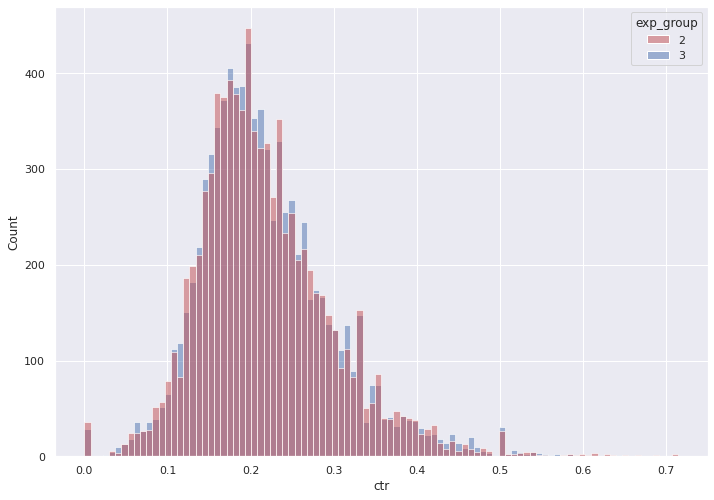

In [6]:
groups = sns.histplot(data = df, 
              x='ctr', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

Проведем симуляцию 10000 AA-тестов.

In [7]:
p_array =[]
for i in range(10000): 
    statistic, p_value = stats.ttest_ind(df[df.exp_group == 2].sample(500).ctr,
                                        df[df.exp_group == 3].sample(500).ctr,
                                        equal_var=False)
    p_array.append(p_value)

Построим гистограмму распределения значений p-values проведенных t-тестов.

<AxesSubplot:ylabel='Count'>

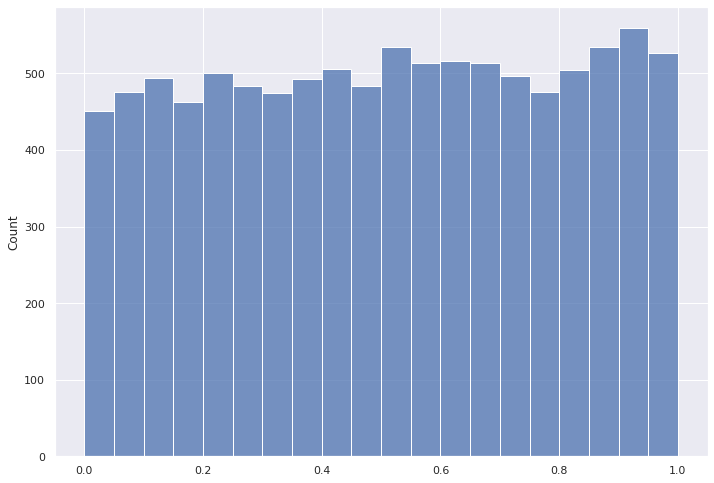

In [8]:
sns.histplot(p_array, binwidth = 0.05)

Посчитаем процент p-values меньше либо равных 0.05

In [9]:
pvalue_percent = 0
for i in p_array:
    if i <= 0.05:
        pvalue_percent += 1
pvalue_percent = pvalue_percent/10000

In [10]:
pvalue_percent*100

4.51

Опираясь на гистограмму, можно предположить, что распределение p-value равномерное. Также мы выяснили, что доля p-value<=0.05 меньше 5%, что доказывает, что тест ошибается меньше, чем в 5% случаев. На основе этого мы можем сделать вывод, что наша система сплитования работет корректно.